In [64]:
import seaborn
import numpy as np
import scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
from pathlib import Path

kicks = [librosa.load(p)[0] for p in Path().glob('Kicks/Kick*.wav')]
snares = [librosa.load(p)[0] for p in Path().glob('Snares/Snare*.wav')]

def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0,0],
        librosa.feature.spectral_centroid(y=signal)[0,0]
    ]

kick_features = np.array([extract_features(x) for x in kicks])
snare_features = np.array([extract_features(x) for x in snares])

snare_features.shape

(52, 2)

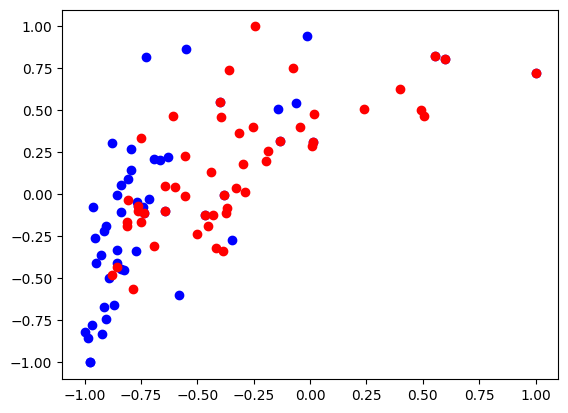

In [68]:
from sklearn.preprocessing import MinMaxScaler

feature_table = np.vstack((kick_features, snare_features))
feature_table.shape

scaler = MinMaxScaler(feature_range=(-1,1))
training_features = scaler.fit_transform(feature_table)
training_features[:,0]

plt.scatter(training_features[:52,0],training_features[:52,1],c='b')
plt.scatter(training_features[42:,0],training_features[42:,1],c='r')


In [142]:
x,sr = librosa.load('funkydrummer.wav')
onset_times = librosa.onset.onset_detect(y=x, sr=sr,units='time')
print(onset_frames) # frame numbers of estimated onsets

[  2   7  11  19  24  40  46  50  57  63  71  75  82  90  94 101 109 114
 121 127 141 148 153 161 166 173 180 184 193 199 204 209 216 225 229 242
 250 255 262 267 275 281 287 294 300 308 315 319 325 332 345 354 364 371
 376 383 389 397 403 409 416 421 428 434 447 455 460 467 475 479 486 492
 498 507 512 518 524 532 537 552 557 563 568 576 584 588 594 600 609 614
 622 628 634 639 652 660 666 671 678 686 691 697 705 710 717 731 738 744
 750 757 761 770 774 780 786 793 799 814]


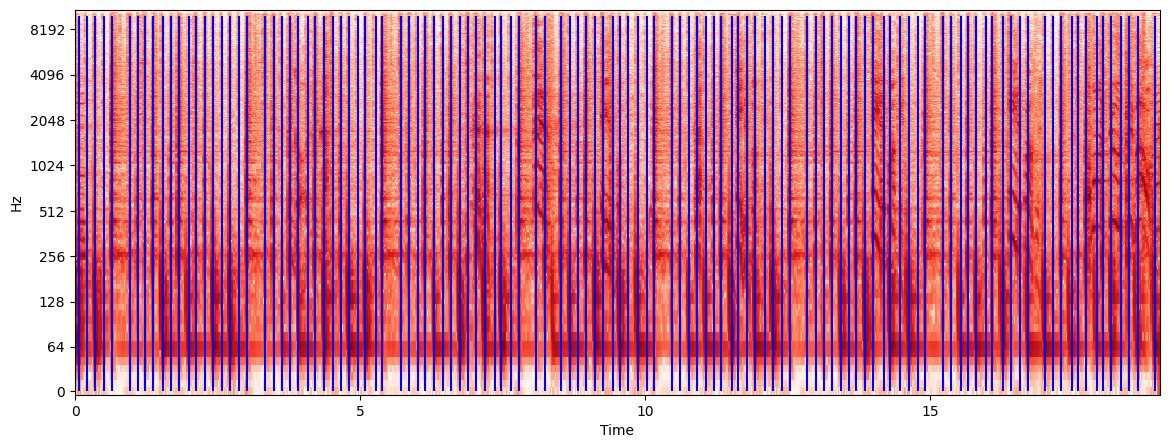

In [143]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

plt.figure(figsize=(14,5))
librosa.display.specshow(logS,x_axis="time",y_axis='log',cmap='Reds')
plt.vlines(onset_times,0,10000,color='blue')

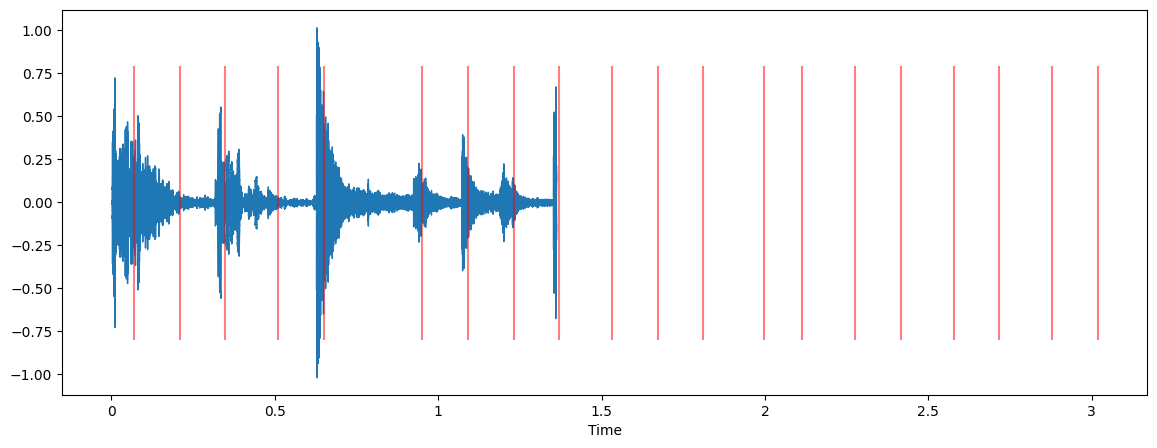

In [144]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x[:30000], sr=sr)
plt.vlines(onset_times[:20], -0.8, 0.79, color='r', alpha=0.5)

In [145]:
clicks = librosa.clicks(times=onset_times,sr=sr,length=len(x))

ipd.Audio(x+clicks,rate=sr)